# Importing Libraries and Data

In [1]:
import pyiast
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import time
import os
import scipy.optimize as optim
import matplotlib.pyplot as plt




df_NAME=pd.read_csv("HEAT_Xe_Kr.csv")

bins_H2S = []
for nam in df_NAME["NAME"]:
    NAM=str(nam)
    f_tmp = open("iso_"+NAM+"_saved.bin",'rb')
    bin_tmp = pickle.load(f_tmp)
    bins_H2S.append(bin_tmp)
    f_tmp.close()
    
bins_CO2 = []
for nam in df_NAME["NAME"]:
    NAM=str(nam)
    f_tmp = open("iso_"+NAM+"_saved.bin",'rb')
    bin_tmp = pickle.load(f_tmp)
    bins_CO2.append(bin_tmp)
    f_tmp.close()

Names_CO2=df_NAME["NAME"].to_numpy()
Name_list=Names_CO2
Names_H2S=df_NAME["NAME"].to_numpy()
dH_CO2 = np.array([df_NAME["Xe_HEAT"],df_NAME["Kr_HEAT"]]).T
dH_H2S = np.array([df_NAME["Xe_HEAT"],df_NAME["Kr_HEAT"]]).T

In [2]:
print(Name_list)

['07001N2_ddec' '12050N2_ddec' '13181N3_ddec' '13182N3_ddec'
 '14000N2_ddec' '15050N2_ddec' '16040N2_ddec' '16190N2_ddec'
 '16191N2_ddec' '18030N2_ddec' '18040N3_ddec' '18130N3_ddec'
 '19291N2_ddec' '19370N2_ddec' '20120N2_ddec' '20121N3_ddec'
 '20501N3_ddec' '20563N3_ddec' '20650N2_ddec' '21021N2_ddec'
 '21033N2_ddec' '21230N2_ddec' '21271N3_ddec' 'BARZUR_clean'
 'COQNIF_clean' 'EBOBIJ_clean' 'GIVHIC_clean' 'LEVNOQ_clean'
 'NAWKII_clean' 'PEFJUF_clean' 'SERWAP_clean' 'TOXMUQ_clean'
 'TOXNEB_clean' 'TOXNIF_clean' 'XUPSAE_clean']


In [3]:
Arrh = lambda T,dH ,T_ref: np.exp(-dH/8.3145*(1/T - 1/T_ref)) # Arrhenius equation (Clasius-Clapeyron Equation)

## Isothermal mixture isotherm
def iso_mix(P_par, T, iso_list, dH_list,Tref_list):
    P_norm = []
    for (p,dh,tref) in zip(P_par, dH_list,Tref_list):
        p_n = Arrh(T,dh,tref)*p 
        P_norm.append(p_n)
    P_norm_arr = np.array(P_norm)
    #print(P_norm_mat.T)
    if P_norm_arr.ndim > 1:
        for i in range(len(P_norm[0])):
            p_tmp = P_norm_arr[i,:]
            p_tmp[p_tmp<0.000001] = 0.000001
            q_IAST_tmp = pyiast.iast(p_tmp,
                                     iso_list,
                                     warningoff=True)
    else:
        try:
            p_tmp = P_norm_arr
            p_tmp[p_tmp<0.000001] = 0.000001
            #print(p_tmp)
            q_IAST_tmp = pyiast.iast(p_tmp,
                                    iso_list,
                                     warningoff=True)
        except:    
            try:
                #print('Initial guess error with P = ',P_par)
                x_IG = np.ones(len(p_tmp))/len(p_tmp)
                q_IAST_tmp = pyiast.iast(p_tmp,
                                        iso_list,adsorbed_mole_fraction_guess = x_IG,
                                        warningoff=True)
            except:
                try:
                    arg_min = np.argmin(p_tmp)
                    p_tmp[p_tmp<0.000001] = 0.000001
                    x_IG = 0.05*np.ones(len(p_tmp))
                    x_IG[arg_min] = 1 - 0.05*(len(p_tmp)-1)
                    #print(x_IG)
                    q_IAST_tmp = pyiast.iast(p_tmp,
                                            iso_list,adsorbed_mole_fraction_guess = x_IG,
                                            warningoff=True)

                except:
                    try:
                        arg_max = np.argmax(p_tmp)
                        p_tmp[p_tmp<0.000001] = 0.000001
                        x_IG = 0.05*np.ones(len(p_tmp))
                        x_IG[arg_max] = 1 - 0.05*(len(p_tmp)-1)
                        #print(x_IG)
                        q_IAST_tmp = pyiast.iast(p_tmp,
                                                iso_list,adsorbed_mole_fraction_guess = x_IG,
                                                warningoff=True)        
                    except:
                        try:
                            arg_max = np.argmax(p_tmp)
                            p_tmp[p_tmp<0.000001] = 0.000001
                            x_IG = 0.15*np.ones(len(p_tmp))
                            x_IG[arg_max] = 1 - 0.15*(len(p_tmp)-1)
                            #print(x_IG)
                            q_IAST_tmp = pyiast.iast(p_tmp,
                                                iso_list,adsorbed_mole_fraction_guess = x_IG,
                                                warningoff=True)
                        except:
                            try:
                                arg_min = np.argmin(p_tmp)
                                p_tmp[p_tmp<0.000001] = 0.000001
                                x_IG = 0.01*np.ones(len(p_tmp))
                                x_IG[arg_min] = 1 - 0.01*(len(p_tmp)-1)
                                #print(x_IG)
                                q_IAST_tmp = pyiast.iast(p_tmp,
                                            iso_list,adsorbed_mole_fraction_guess = x_IG,
                                            warningoff=True)

                            except:
                                arg_max = np.argmax(p_tmp)
                                p_tmp[p_tmp<0.000001] = 0.000001
                                x_IG = 0.01*np.ones(len(p_tmp))
                                x_IG[arg_max] = 1 - 0.01*(len(p_tmp)-1)
                                #print(x_IG)
                                q_IAST_tmp = pyiast.iast(p_tmp,
                                                iso_list,adsorbed_mole_fraction_guess = x_IG,
                                            warningoff=True)                                
           
    return q_IAST_tmp

In [4]:
def sat_fraction(y_lead,q_lead_array, y_follow,q_follow_array):
    q_sat_lead_part, q_sat_lead_tot, q_des_lead = q_lead_array
    q_sat_fo, q_des_fo = q_follow_array
    numo = y_follow*(q_sat_lead_part - q_des_lead)+y_lead*q_des_fo
    denom = y_follow*(q_sat_lead_part - q_sat_lead_tot)+y_lead*q_sat_fo
    sat_frac = numo/denom
    return sat_frac

In [5]:
def x2x(x_ini,P_high,P_low,
        iso_input, dH_input, Tref_input, 
        yfeed,Tfeed):
    iso_1 = iso_input[0] # Ethane (C2H6)
    iso_2 = iso_input[1] # Ethylene (C2H4)
    iso  = [iso_1,iso_2]
    dH_1, dH_2 = dH_input[:2]         # (kJ/mol): Heat of adsorption
    dH = np.array([dH_1,dH_2])*1000    # (J/mol): Heat of adsorption 
    P_low_part = np.array(x_ini)*P_low      # (bar): partial pressure
    P_high_part = np.array(yfeed)*P_high    # (bar): partial pressure
    ### Uptakes
    #print(P_low_part)
    P_low_part = np.reshape(P_low_part,len(iso))
    q_des = iso_mix(P_low_part,Tfeed,iso,
                    dH,Tref_input)
    #print(P_high_part)
    P_high_part = np.reshape(P_high_part,len(iso))
    q_sat_tot = iso_mix(P_high_part,Tfeed,iso,
                        dH,Tref_input)
    Dq_tot = q_sat_tot-q_des
    ### Leading component ?
    sat_extent = np.array(yfeed)/Dq_tot # Saturation extent kg/mol
    ind_lead_tot = np.argmax(sat_extent)
    dq = q_sat_tot - q_des
    x_out = dq/(np.sum(dq))
    return x_out,ind_lead_tot



def rec(x_ini,P_high,P_low,
        iso_input, dH_input, Tref_input, 
        yfeed,Tfeed):
    def x_err(xx):
        x_new,i_lead = x2x([xx, 1-xx],P_high,P_low,
                           iso_input, dH_input, Tref_input, 
                           yfeed,Tfeed)
        return (xx-x_new[0])**2
    #sol = optim.minimize(x_err,x_ini,method='COBYLA')
    sol = optim.least_squares(x_err,x_ini,bounds = [0,1])
    x_sol = sol.x
    _,i_lead = x2x([x_sol, 1- x_sol],P_high,P_low,
                   iso_input, dH_input, Tref_input, 
                   yfeed,Tfeed)
    #if i_lead  < 0.5:
    #    return -1
    Recovery = 1-(1-x_sol)/x_sol*yfeed[0]/yfeed[1]
    if Recovery < 0 or Recovery > 1:
        Recovery = 1-x_sol/(1-x_sol)*yfeed[1]/yfeed[0]
 #   return Recovery, i_lead, x_sol+
    return Recovery, i_lead, x_sol





In [6]:
T_feed_in = 313         # (K) temperature or 298K
T_tri = [298.15,]*2
#y_feed_in = np.array([0.83356,0.1644])
y_ethy = 8/10
#y_ethy = 0.83356
y_feed_in = np.array([1-y_ethy,y_ethy])
Rec_list_set = []
xx_list_set = []
leading_index_set = []
#Pl_list = np.linspace(0.004,0.5,30)
Pl_list = 1/(10**np.linspace(0.5,3,101))

for binn,dH,nam in zip(bins_CO2,dH_CO2,Name_list):
    Rec_list = []
    x_list = []
    leading_index = []
    
    for pl in Pl_list:
        try:
            x_guess = 0.05
            rec_tmp,l_ind,x_tmp = rec(x_guess, 1,pl,
                                      binn, dH, T_tri,y_feed_in, T_feed_in)
        except:
            try:
                x_guess = 0.4
                rec_tmp,l_ind,x_tmp = rec(x_guess, 1,pl,
                                          binn, dH, T_tri,y_feed_in, T_feed_in)
            except:
                try:
                    x_guess = 0.8
                    rec_tmp,l_ind,x_tmp = rec(x_guess, 1,pl,
                                              binn, dH, T_tri,y_feed_in, T_feed_in)                        
                except:
                    try:
                        x_guess = 0.9
                        rec_tmp,l_ind,x_tmp = rec(x_guess, 1,pl,
                                                  binn, dH, T_tri,y_feed_in, T_feed_in)                        
                    except:
                        try:
                            x_guess = 0.95
                            rec_tmp,l_ind,x_tmp = rec(x_guess, 1,pl,
                                                      binn, dH, T_tri,y_feed_in, T_feed_in)                        
                        except:
                            x_guess = 0.98
                            rec_tmp,l_ind,x_tmp = rec(x_guess, 1,pl,
                                                      binn, dH, T_tri,y_feed_in, T_feed_in)
                        
        #x_guess[0] = x_tmp*1.01
        Rec_list.append(rec_tmp)
        x_list.append(x_tmp[0])
        leading_index.append(l_ind)
    Rec_list_set.append(Rec_list)
    xx_list_set.append(x_list)
    leading_index_set.append(leading_index)
    print(nam)
    #print(Rec_list[-1])
    print(x_tmp)
    

07001N2_ddec
[0.64177375]
12050N2_ddec
[0.50676704]
13181N3_ddec
[0.6099654]
13182N3_ddec
[0.58759374]
14000N2_ddec
[0.48634602]
15050N2_ddec
[0.54752902]
16040N2_ddec
[0.5767615]
16190N2_ddec
[0.52869972]
16191N2_ddec
[0.50267152]
18030N2_ddec
[0.54406931]
18040N3_ddec
[0.56086991]
18130N3_ddec
[0.5207829]
19291N2_ddec
[0.49965009]
19370N2_ddec
[0.56229001]
20120N2_ddec
[0.53281465]
20121N3_ddec
[0.60426514]
20501N3_ddec
[0.52343886]
20563N3_ddec
[0.57949783]
20650N2_ddec
[0.4925953]
21021N2_ddec
[0.53223008]
21033N2_ddec
[0.50222944]
21230N2_ddec
[0.4604965]
21271N3_ddec
[0.49901668]
BARZUR_clean
[0.64317723]
COQNIF_clean
[0.68538319]
EBOBIJ_clean
[0.66715679]
GIVHIC_clean
[0.69375536]
LEVNOQ_clean
[0.66168887]
NAWKII_clean
[0.6595431]
PEFJUF_clean
[0.68818274]
SERWAP_clean
[0.64224263]
TOXMUQ_clean
[0.6160377]
TOXNEB_clean
[0.61242259]
TOXNIF_clean
[0.6167161]
XUPSAE_clean
[0.6123834]


In [7]:
for i in range(len(Name_list)):
    print(i, Name_list[i])

0 07001N2_ddec
1 12050N2_ddec
2 13181N3_ddec
3 13182N3_ddec
4 14000N2_ddec
5 15050N2_ddec
6 16040N2_ddec
7 16190N2_ddec
8 16191N2_ddec
9 18030N2_ddec
10 18040N3_ddec
11 18130N3_ddec
12 19291N2_ddec
13 19370N2_ddec
14 20120N2_ddec
15 20121N3_ddec
16 20501N3_ddec
17 20563N3_ddec
18 20650N2_ddec
19 21021N2_ddec
20 21033N2_ddec
21 21230N2_ddec
22 21271N3_ddec
23 BARZUR_clean
24 COQNIF_clean
25 EBOBIJ_clean
26 GIVHIC_clean
27 LEVNOQ_clean
28 NAWKII_clean
29 PEFJUF_clean
30 SERWAP_clean
31 TOXMUQ_clean
32 TOXNEB_clean
33 TOXNIF_clean
34 XUPSAE_clean


In [8]:
Rec_sort_tmp = []
for i in range(len(Rec_list_set)):
    rec_tmm = np.reshape(np.array(Rec_list_set[i]),[-1])
    Rec_sort_tmp.append(rec_tmm)
Rec_sort_tmp = np.array(Rec_sort_tmp)

Sort_target = np.reshape(np.array(Rec_sort_tmp)[:,-1],-1)
#print(Sort_target)
arg_st = np.argsort(Sort_target)[::-1]
Name_sort = np.array(Name_list)[arg_st]

Rec_sort = Rec_sort_tmp[arg_st,:]
leading_sort = np.array(leading_index_set)[arg_st]
#is_exp_sort = is_exp[arg_st]

print(Pl_list[-5]*100)
print(Name_sort)
print(Rec_sort[:,-5])

0.12589254117941662
['GIVHIC_clean' 'PEFJUF_clean' 'COQNIF_clean' 'EBOBIJ_clean'
 'LEVNOQ_clean' 'NAWKII_clean' 'BARZUR_clean' 'SERWAP_clean'
 '07001N2_ddec' 'TOXNIF_clean' 'TOXMUQ_clean' 'TOXNEB_clean'
 'XUPSAE_clean' '13181N3_ddec' '20121N3_ddec' '13182N3_ddec'
 '20563N3_ddec' '16040N2_ddec' '19370N2_ddec' '18040N3_ddec'
 '15050N2_ddec' '18030N2_ddec' '20120N2_ddec' '21021N2_ddec'
 '16190N2_ddec' '20501N3_ddec' '18130N3_ddec' '12050N2_ddec'
 '16191N2_ddec' '21033N2_ddec' '19291N2_ddec' '21271N3_ddec'
 '20650N2_ddec' '14000N2_ddec' '21230N2_ddec']
[0.88954651 0.88658939 0.88515996 0.87514191 0.87205703 0.87082904
 0.86119692 0.86061542 0.86033023 0.84450002 0.84407227 0.84165408
 0.84162909 0.84000325 0.83614714 0.82440578 0.81846758 0.81641765
 0.8052571  0.8041352  0.79327725 0.79037387 0.78066755 0.78014868
 0.77701336 0.77225821 0.76983353 0.75655236 0.75252745 0.75209686
 0.74952294 0.74888443 0.74235693 0.7358368  0.70697657]


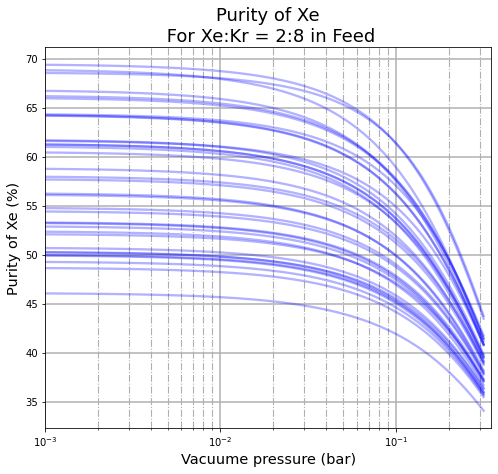

In [12]:
line_len = [1,2,4]
space_len = [1,2,4]
l_style = [(0,())]
for line in line_len:
    for space in space_len:
        style_temp = (line, space)
        l_style.append((0,style_temp))
L_styles = ['solid','dotted','dashdot','dashed'] + [(0,(3,5,1,5,1,5))]
c_list = ['k','b','g','r']
cc = 0
lc = 0
## Semilog graph
plt.figure(figsize= [8,7])
for RR,nn in zip(xx_list_set,Name_sort):
    plt.semilogx(Pl_list,np.array(RR)*100,label = nn,
                 color = 'b',linewidth = 2.3,alpha=0.3)
    lc = lc + 1
    if lc  > len(L_styles)-1:
        cc = cc + 1
    if lc > len(L_styles)-1:
        lc = 0
    if cc > len(c_list)-1:
        cc = 0
#plt.plot([0,20],[90,90],ls='--',lw='3.5',color='r')
## Grid
plt.grid(which = 'major',ls ='-',linewidth = 1.5)
plt.grid(which = 'minor',ls ='-.',linewidth = 1.1)
## Legend
#plt.legend(fontsize = 13,loc = (1.02,0.08))
## x,y axis
plt.xlabel('Vacuume pressure (bar)',fontsize = 14.5)
plt.ylabel('Purity of Xe (%)',fontsize= 14.5)
plt.xlim([0.001, 0.35])
#plt.xticks(ticks= [1.0, 2.0, 5,10,20,50,100],
    #       labels = ['1','2','5','10','20','50','100'],
      #     fontsize = 12.5)
#plt.yticks(ticks= [60,70,80,90,100],
#           labels = ['60','70','80','90','100'],
#           fontsize = 12.5)
plt.title('Purity of Xe\n For Xe:Kr = 2:8 in Feed',fontsize = 18)
plt.savefig('VSA_2_8_full.png')
plt.show()

101
[0.88109932]
113
[0.87313662]
1182
[0.81911475]
12
[0.85436795]
1217
[0.85541655]
1259
[0.82995575]
1340
[0.85280902]
1395
[0.90087574]


C:\Users\LeBlanc\anaconda3\pyiast\isotherms.py:354: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["Ka"] * pressure


1422
[0.94376564]
1426
[0.85175186]
1441
[0.91531973]
1442
[0.94196382]
1463
[0.41024324]
1540
[0.90552576]
1542
[0.88794399]
1577
[0.84689582]
1580
[0.89021308]
1600
[0.75396629]
164
[0.88698948]
1689
[0.90228073]
1703
[0.81431994]
1706
[0.89547574]
1739
[0.8676916]
175
[0.90240711]
1781
[0.88132243]
1895
[0.75131061]
1925
[0.89598078]
1929
[0.81623161]
193
[0.90323097]
1948
[0.91676126]
1961
[0.82330761]
1962
[0.88158401]
1998
[0.92024152]
2006
[0.9081551]


C:\Users\LeBlanc\anaconda3\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


2064
[0.8899766]
2066
[0.77687087]
2190
[0.81416662]
2193
[0.87752154]
222
[0.89734117]
2229
[0.32828419]
2231
[0.87224077]
2276
[0.87232477]
2277
[0.87916906]
2278
[0.82901746]
2279
[0.91845219]
2280
[0.91944781]
2286
[0.89619943]
2305
[0.89441722]
2316
[0.90772496]
2332
[0.92010942]
234
[0.89089242]
2419
[0.91575016]
2434
[0.84541397]
244
[0.91220413]
2487
[0.75907515]
2489
[0.75727921]
2493
[0.90422212]
2514
[0.8856373]
2528
[0.89333231]
2529
[0.82406734]
2530
[0.83464973]
2531
[0.84841303]
2532
[0.89425623]
2533
[0.87315228]
2534
[0.93352746]
2535
[0.93586644]
2536
[0.94353675]
2550
[0.48581354]
269
[0.83886118]
2709
[0.88897485]
2715
[0.87331161]
2751
[0.42927371]
2753
[0.89672685]
2764
[0.75899916]
2768
[0.77876902]
2769
[0.83662136]
2780
[0.86377348]
2781
[0.86954074]
2782
[0.80585397]
2783
[0.90043485]
2784
[0.87967952]
279
[0.89317189]
281
[0.88451854]
2816
[0.8509755]
2817
[0.83248018]
2818
[0.87122858]
2819
[0.90534404]
2820
[0.89872972]
2821
[0.86291991]
2822
[0.92407105]
2

# Maximum Purity

## $x_{max}$ Cacluation

In [17]:
xx_max_list = []
for ii in range(len(xx_list_set)):
    xmax_tmp = np.max(xx_list_set[ii])
    xx_max_list.append(xmax_tmp)
    
arg_over90 = np.array(xx_max_list) > 0.5
Names_90 = Names_CO2[arg_over90]
dH_90 = dH_CO2[arg_over90]
bins_90 = np.array(bins_CO2)[arg_over90]
xx_max_90 = np.array(xx_max_list)[arg_over90]
xx_list_90 = np.array(xx_list_set)[arg_over90]

## Sorting

NameError: name 'arg_sort' is not defined

In [18]:
arg_sort = np.argsort(xx_max_90)[::-1]
xx_max_so = xx_max_90[arg_sort]
xx_list_so = xx_list_90[arg_sort]
Names_so = Names_90[arg_sort]
dH_so = dH_90[arg_sort]
bins_so = bins_90[arg_sort]


## Bar Graph: Maximum purity

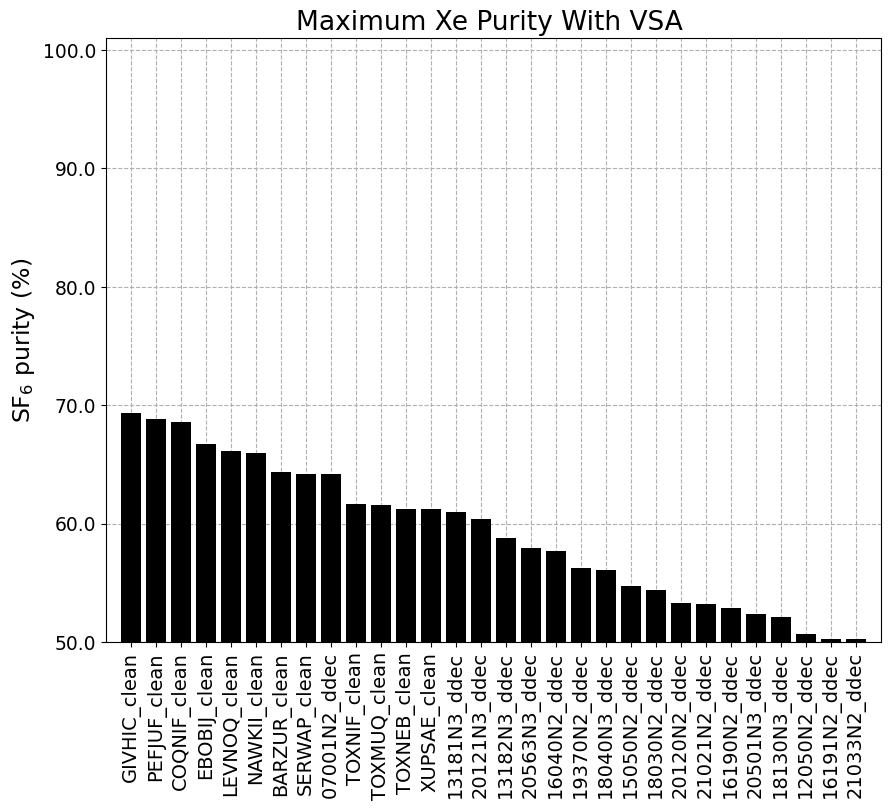

In [22]:
fig_xmax, ax_xmax = plt.subplots(figsize= [10,8],dpi = 100)
plt.grid(which = 'major', ls = '--')
ax_xmax.set_axisbelow(True)
ax_xmax.bar(np.arange(len(xx_max_so)),xx_max_so*100,
            color = 'k')

### x axis ###
ax_xmax.set_xticks(np.arange(len(Names_so)))
ax_xmax.set_xticklabels(Names_so,fontsize = 14,
                        rotation  = 90)
ax_xmax.set_title('Maximum Xe Purity With VSA ',fontsize = 19)
ax_xmax.set_xlim([-1,len(Names_so)])
#ax_xmax.set_xlabel('SF$_6$ purity (%)',fontsize=16)

### y axis ###
ax_xmax.set_ylim([50,101])
ax_xmax.set_ylabel('SF$_6$ purity (%)',fontsize=17)
ytick_xmax = ax_xmax.get_yticks()
ax_xmax.set_yticklabels(ytick_xmax,fontsize = 13.5)
plt.savefig('VSA_purity_bar.png')


# VSA Energy Consumption

In [23]:
gamma = 1.4
def VSA_E(Ph_in,Pl_in, T_in,eta_eff_in):
    P_ratio_term = (Ph_in/Pl_in)**((gamma-1)/gamma)-1
    E_comp = (gamma)/(gamma-1)*8.3145*T_in/eta_eff_in*P_ratio_term
    return E_comp
VSA_E(1,0.01,300,0.5)

47625.01377387299

In [24]:
from scipy.interpolate import interp1d

In [48]:
print(xx_list_so)

[[0.43472203 0.44722261 0.45947754 ... 0.69366839 0.69371313 0.69375536]
 [0.41176436 0.42325351 0.43458996 ... 0.68806227 0.68812424 0.68818274]
 [0.43758126 0.45019447 0.46253945 ... 0.68531188 0.68534857 0.68538319]
 ...
 [0.36411421 0.37099174 0.37763397 ... 0.50670687 0.50673782 0.50676704]
 [0.35963068 0.366392   0.37293182 ... 0.50260968 0.50264149 0.50267152]
 [0.36306667 0.36982767 0.37635169 ... 0.50217112 0.50220112 0.50222944]]


In [52]:
Pl_list

array([0.31622777, 0.29853826, 0.28183829, 0.26607251, 0.25118864,
       0.23713737, 0.22387211, 0.2113489 , 0.19952623, 0.18836491,
       0.17782794, 0.1678804 , 0.15848932, 0.14962357, 0.14125375,
       0.13335214, 0.12589254, 0.11885022, 0.11220185, 0.10592537,
       0.1       , 0.09440609, 0.08912509, 0.08413951, 0.07943282,
       0.07498942, 0.07079458, 0.06683439, 0.06309573, 0.05956621,
       0.05623413, 0.05308844, 0.05011872, 0.04731513, 0.04466836,
       0.04216965, 0.03981072, 0.03758374, 0.03548134, 0.03349654,
       0.03162278, 0.02985383, 0.02818383, 0.02660725, 0.02511886,
       0.02371374, 0.02238721, 0.02113489, 0.01995262, 0.01883649,
       0.01778279, 0.01678804, 0.01584893, 0.01496236, 0.01412538,
       0.01333521, 0.01258925, 0.01188502, 0.01122018, 0.01059254,
       0.01      , 0.00944061, 0.00891251, 0.00841395, 0.00794328,
       0.00749894, 0.00707946, 0.00668344, 0.00630957, 0.00595662,
       0.00562341, 0.00530884, 0.00501187, 0.00473151, 0.00446

In [53]:
### CONDITIONS:

# T_feed_in, y_feed_in
eta_vac = 0.8
E_list = []
Pl_opt_list = []
cc = 0

for xxx in xx_list_so:
    f_int = interp1d(xxx,Pl_list)    
    try:
        Pl_opt_tmp = f_int(0.8)
    except:
        Pl_opt_tmp = Pl_list[-1]
    E_tmp = VSA_E(1,Pl_opt_tmp,T_feed_in, eta_vac)
    Pl_opt_list.append(Pl_opt_tmp)
    E_list.append(E_tmp)
    print(Names_so[cc], ':', E_tmp)
    cc = cc + 1
    

GIVHIC_clean : 70555.35608260159
PEFJUF_clean : 70555.35608260159
COQNIF_clean : 70555.35608260159
EBOBIJ_clean : 70555.35608260159
LEVNOQ_clean : 70555.35608260159
NAWKII_clean : 70555.35608260159
BARZUR_clean : 70555.35608260159
SERWAP_clean : 70555.35608260159
07001N2_ddec : 70555.35608260159
TOXNIF_clean : 70555.35608260159
TOXMUQ_clean : 70555.35608260159
TOXNEB_clean : 70555.35608260159
XUPSAE_clean : 70555.35608260159
13181N3_ddec : 70555.35608260159
20121N3_ddec : 70555.35608260159
13182N3_ddec : 70555.35608260159
20563N3_ddec : 70555.35608260159
16040N2_ddec : 70555.35608260159
19370N2_ddec : 70555.35608260159
18040N3_ddec : 70555.35608260159
15050N2_ddec : 70555.35608260159
18030N2_ddec : 70555.35608260159
20120N2_ddec : 70555.35608260159
21021N2_ddec : 70555.35608260159
16190N2_ddec : 70555.35608260159
20501N3_ddec : 70555.35608260159
18130N3_ddec : 70555.35608260159
12050N2_ddec : 70555.35608260159
16191N2_ddec : 70555.35608260159
21033N2_ddec : 70555.35608260159


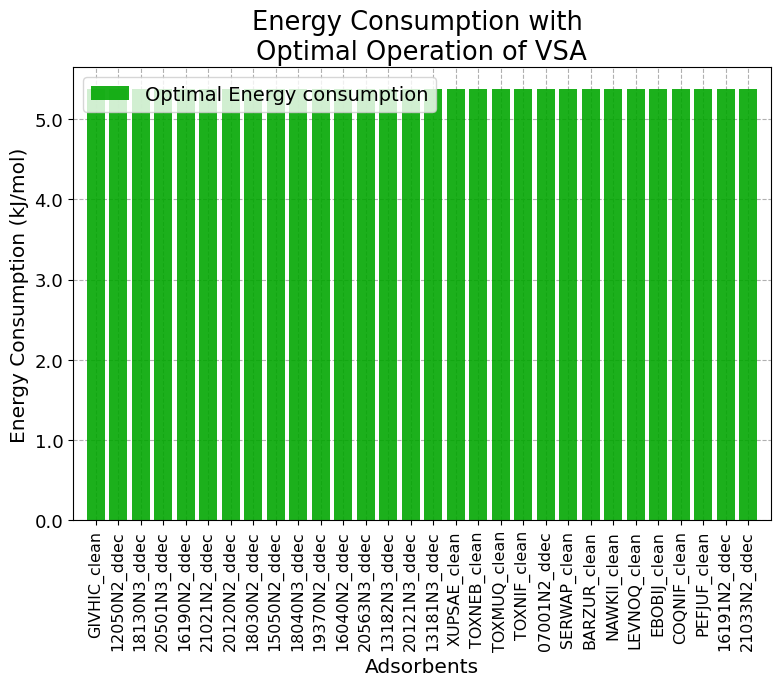

In [54]:
E_consu_arr = np.array(E_list)
E_consu_arr = np.reshape(E_consu_arr, [-1,])
arg_sort_e = np.argsort(E_consu_arr)

E_consu_sort = E_consu_arr[arg_sort_e]
Names_sort_e = Names_so[arg_sort_e]
dH_sort_e = dH_so[arg_sort_e]
bins_sort_e = bins_so[arg_sort_e]
Popt_sort_e = np.array(Pl_opt_list)[arg_sort_e]

fig_e, ax_e = plt.subplots(figsize = [9,6],dpi = 100)
plt.grid(which = 'major',linestyle  = '--')
ax_e.set_axisbelow(True)

bar1 = ax_e.bar(np.arange(len(E_consu_arr)),E_consu_sort/13129,
                color = [0,0.65,0], alpha = 0.89,
                label = 'Optimal Energy consumption')

ax_e.set_ylabel('Energy Consumption (kJ/mol)',fontsize = 14.5)
ax_e.set_xlabel('Adsorbents',fontsize = 14.5)

ax_e.set_title('Energy Consumption with \nOptimal Operation of VSA',fontsize = 18.5)
#ax_e.set_yticks([20,30,40,50,60,70,80,90,100])
#ax_e.set_yticklabels([20,30,40,50,60,70,80,90,100])

#ax_e.set_xlim([-2,len(E_consu_list)*1.01])
#ax_e.set_ylim([18,106])
#ax_e.set_xticks(np.arange(0,len(xx_xmax)))
ax_e.set_xticks(np.arange(len(Names_sort_e)))
ax_e.set_xticklabels(Names_sort_e,rotation = 90,fontsize= 11.5)
yticklab = ax_e.get_yticks()
ax_e.set_yticklabels(yticklab, fontsize = 13)

#ax_e.set_ylim([60,107])
ax_e.set_xlim([-1,len(E_consu_sort)])
frame1 = plt.gca()

#for xlabel_i in frame1.axes.get_xticklabels():
#    xlabel_i.set_visible(False)
#    xlabel_i.set_fontsize(0.0)

#for tick in frame1.axes.get_xticklines():
#    tick.set_visible(False)
    
plt.legend(fontsize = 14,loc = 'upper left')
plt.show()
#plt.figure(figsize =[9,6], dpi = 100)
#plt.bar(np.arange(len(xx_xmax)),xx_xmax, )

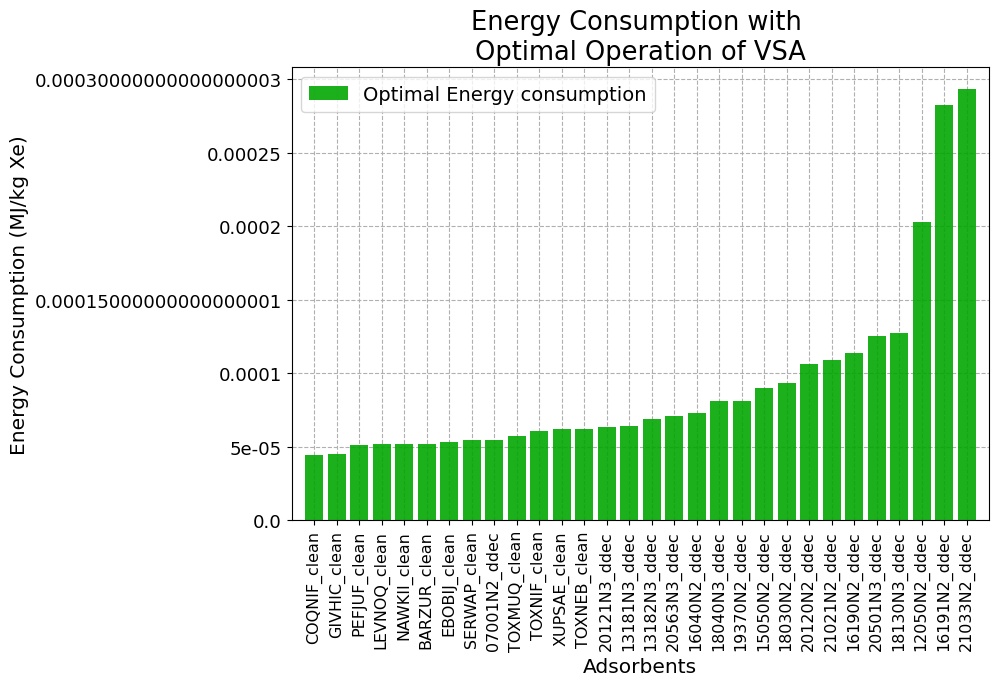

In [41]:
E_consu_arr = np.array(E_list)
E_consu_arr = np.reshape(E_consu_arr, [-1,])
arg_sort_e = np.argsort(E_consu_arr)

E_consu_sort = E_consu_arr[arg_sort_e]
Names_sort_e = Names_so[arg_sort_e]
dH_sort_e = dH_so[arg_sort_e]
bins_sort_e = bins_so[arg_sort_e]
Popt_sort_e = np.array(Pl_opt_list)[arg_sort_e]

fig_e, ax_e = plt.subplots(figsize = [9,6],dpi = 100)
plt.grid(which = 'major',linestyle  = '--')
ax_e.set_axisbelow(True)

bar1 = ax_e.bar(np.arange(len(E_consu_arr)),E_consu_sort/1000/131292,
                color = [0,0.65,0], alpha = 0.89,
                label = 'Optimal Energy consumption')

ax_e.set_ylabel('Energy Consumption (M)',fontsize = 14.5)
ax_e.set_xlabel('Adsorbents',fontsize = 14.5)

ax_e.set_title('Energy Consumption with \nOptimal Operation of VSA',fontsize = 18.5)
#ax_e.set_yticks([20,30,40,50,60,70,80,90,100])
#ax_e.set_yticklabels([20,30,40,50,60,70,80,90,100])

#ax_e.set_xlim([-2,len(E_consu_list)*1.01])
#ax_e.set_ylim([18,106])
#ax_e.set_xticks(np.arange(0,len(xx_xmax)))
ax_e.set_xticks(np.arange(len(Names_sort_e)))
ax_e.set_xticklabels(Names_sort_e,rotation = 90,fontsize= 11.5)
yticklab = ax_e.get_yticks()
ax_e.set_yticklabels(yticklab, fontsize = 13)

#ax_e.set_ylim([60,107])
ax_e.set_xlim([-1,len(E_consu_sort)])
frame1 = plt.gca()
#for xlabel_i in frame1.axes.get_xticklabels():
#    xlabel_i.set_visible(False)
#    xlabel_i.set_fontsize(0.0)

#for tick in frame1.axes.get_xticklines():
#    tick.set_visible(False)
    
plt.legend(fontsize = 14,loc = 'upper left')
plt.show()
#plt.figure(figsize =[9,6], dpi = 100)
#plt.bar(np.arange(len(xx_xmax)),xx_xmax, )